<a href="https://colab.research.google.com/github/kyungjin96/test_ml/blob/main/lab_11_0_cnn_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data format review

https://developpaper.com/understand-nhwc-data-format-in-edgeboard/ 

![image](https://i.stack.imgur.com/7n2Ls.png)

![img](https://www.qm-k.xyz/2019/10/14/NCHW%E4%B8%8ENHWC/diff.png)

https://www.qm-k.xyz/2019/10/14/NCHW%E4%B8%8ENHWC/

OpenCV stores color images using the BGR convention 
while matplotlib uses the RGB convention.

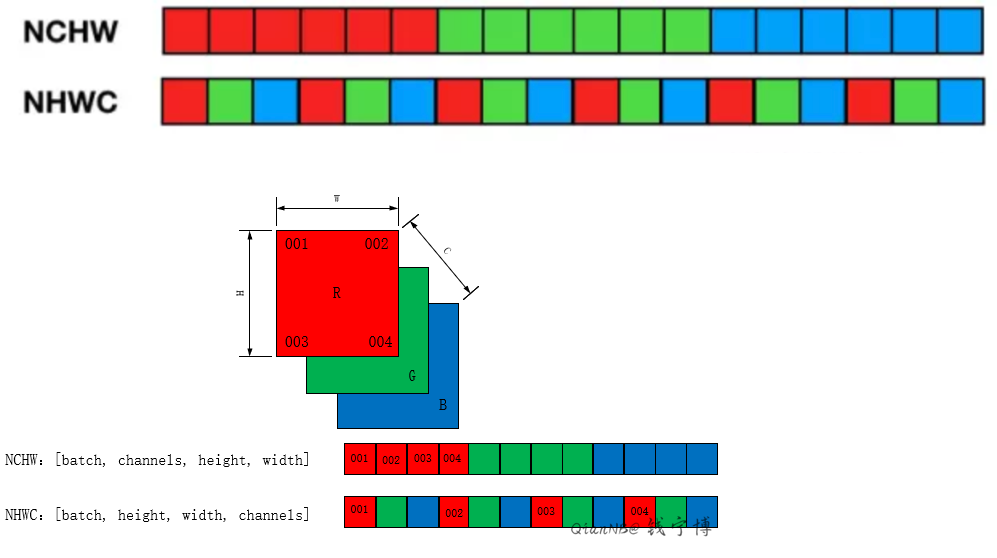

In [ ]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
#!pip uninstall tensorflow
#!pip install tensorflow==1.15

In [ ]:
%tensorflow_version
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


4
(1, 3, 3, 1)
float32
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


"\nsess = tf.InteractiveSession()\nimage = np.array([[[[1],[2],[3]],\n                   [[4],[5],[6]], \n                   [[7],[8],[9]]]], dtype=np.float32)\nprint(image.shape)\nplt.imshow(image.reshape(3,3), cmap='Greys')\n"

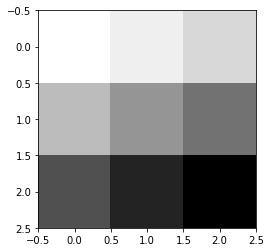

In [ ]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.ndim)
print(image.shape)
print(image.dtype)
print(image)
plt.imshow(image.reshape(3,3), cmap='Greys')


'''
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
'''

## 1 filter (2,2,1,1) with padding: VALID

weight.shape = 1 filter (2 , 2 , 1, 1)
![image](https://cloud.githubusercontent.com/assets/901975/24833375/c0d9c262-1cf9-11e7-9efc-5dd6fe0fedb0.png)

filter: A Tensor. Must have the same type as input. A 4-D tensor of shape [filter_height, filter_width, in_channels, out_channels]

imag:
 [[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
conv2d_img.shape swap (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


'\n# print("imag:\n", image)\nprint("image.shape", image.shape)\nweight = tf.constant([[[[1.]],[[1.]]],\n                      [[[1.]],[[1.]]]])\nprint("weight.shape", weight.shape)\nconv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding=\'VALID\')\nconv2d_img = conv2d.eval()\nprint("conv2d_img.shape", conv2d_img.shape)\nconv2d_img = np.swapaxes(conv2d_img, 0, 3)\nfor i, one_img in enumerate(conv2d_img):\n    print(one_img.reshape(2,2))\n    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap=\'gray\')\n'

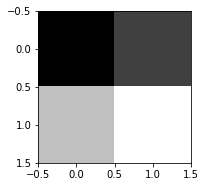

In [ ]:
print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("conv2d_img.shape swap", conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

'''
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
'''

## 1 filter (2,2,1,1) with padding:SAME
![image](https://cloud.githubusercontent.com/assets/901975/24833381/fd01869e-1cf9-11e7-9d59-df08c7c6e5c4.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


'\n# print("imag:\n", image)\nprint("image.shape", image.shape)\n\nweight = tf.constant([[[[1.]],[[1.]]],\n                      [[[1.]],[[1.]]]])\nprint("weight.shape", weight.shape)\nconv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding=\'SAME\')\nconv2d_img = conv2d.eval()\nprint("conv2d_img.shape", conv2d_img.shape)\nconv2d_img = np.swapaxes(conv2d_img, 0, 3)\nfor i, one_img in enumerate(conv2d_img):\n    print(one_img.reshape(3,3))\n    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap=\'gray\')\n'

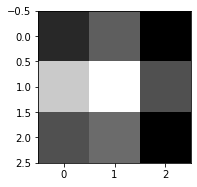

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')


'''
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
'''

## 3 filters (2,2,1,3) (H, W, C, N)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


'\n# print("imag:\n", image)\nprint("image.shape", image.shape)\n\nweight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],\n                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])\nprint("weight.shape", weight.shape)\nconv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding=\'SAME\')\nconv2d_img = conv2d.eval()\nprint("conv2d_img.shape", conv2d_img.shape)\nconv2d_img = np.swapaxes(conv2d_img, 0, 3)\nfor i, one_img in enumerate(conv2d_img):\n    print(one_img.reshape(3,3))\n    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap=\'gray\')\n'

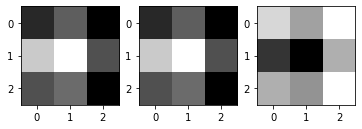

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

'''
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
'''

## MAX POOLING
![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)

![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)


In [ ]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
#print(pool.eval())


'''
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())
'''

(1, 1, 1, 1)


"\nimage = np.array([[[[4],[3]],\n                    [[2],[1]]]], dtype=np.float32)\npool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],\n                    strides=[1, 1, 1, 1], padding='VALID')\nprint(pool.shape)\nprint(pool.eval())\n"

## SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

In [ ]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)


'''
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())
'''

(1, 2, 2, 1)


"\nimage = np.array([[[[4],[3]],\n                    [[2],[1]]]], dtype=np.float32)\npool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],\n                    strides=[1, 1, 1, 1], padding='SAME')\nprint(pool.shape)\nprint(pool.eval())\n"

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print([x_train.ndim, x_train.shape, x_train.dtype])
print([y_train.ndim, y_train.shape, y_train.dtype])
print([x_test.ndim, x_test.shape, x_test.dtype])
print([y_test.ndim, y_test.shape, y_test.dtype])

'''
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
'''

11493376/11490434 [==============================] - 0s 0us/step
[3, (60000, 28, 28), dtype('uint8')]
[1, (60000,), dtype('uint8')]
[3, (10000, 28, 28), dtype('uint8')]
[1, (10000,), dtype('uint8')]


'\nfrom tensorflow.examples.tutorials.mnist import input_data\nmnist = input_data.read_data_sets("MNIST_data/", one_hot=True)\n# Check out https://www.tensorflow.org/get_started/mnist/beginners for\n# more information about the mnist dataset\n'

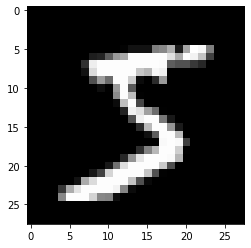

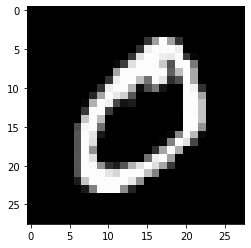

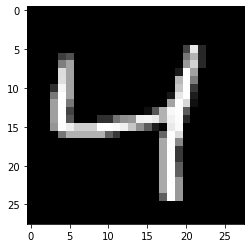

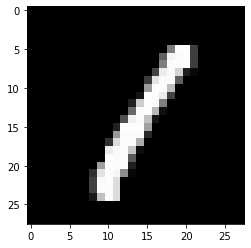

"\nimg = mnist.train.images[0].reshape(28,28)\nplt.imshow(img, cmap='gray')\n"

In [ ]:
#img = x_train.images[0].reshape(28,28)
img = x_train[0].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

img = x_train[1].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

img = x_train[2].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

img = x_train[3].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()


'''
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')
'''

(28, 28)


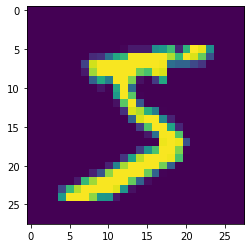

(28, 28)


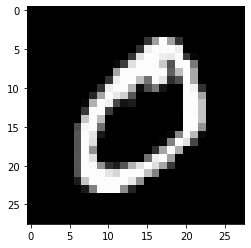

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

(X_train,y_train),(X_test,y_test) = mnist.load_data()

print(X_train[0].shape)
plt.imshow(X_train[0])
plt.show()
print(X_train[1].shape)
plt.imshow(X_train[1], cmap='gray')
plt.show()

필터의 특성 파악

```
shape(3, 3, 1, 1)
Blur
[[[[0.0625]], [[0.125]], [[0.0625]]],
 [[[0.125]],  [[0.25]],  [[0.125]]],
 [[[0.0625]], [[0.125]], [[0.0625]]]])

Sharpen
[[[[0.]],  [[-1.]], [[0.]]],
 [[[-1.]], [[5.]],  [[-1.]]],
 [[[0.]],  [[-1.]], [[0.]]]])

outline
[[[[-1.]], [[-1.]], [[-1.]]],
 [[[-1.]], [[8.]],  [[-1.]]],
 [[[-1.]], [[-1.]], [[-1.]]]])

identity
[[[[0.]], [[0.]], [[0.]]],
 [[[0.]], [[1.]], [[0.]]],
 [[[0.]], [[0.]], [[0.]]]])

top sobel
[[[[1.]],  [[2.]],  [[1.]]],
 [[[0.]],  [[0.]],  [[0.]]],
 [[[-1.]], [[-2.]], [[-1.]]]])

bottom sobel
[[[[-1.]], [[-2.]], [[-1.]]],
 [[[0.]],  [[0.]],  [[0.]]],
 [[[1.]],  [[2.]],  [[1.]]]])

left sobel
[[[[1.]], [[0.]], [[-1.]]],
 [[[2.]], [[0.]], [[-2.]]],
 [[[1.]], [[0.]], [[-1.]]]])

right sobel
[[[[-1.]], [[0.]], [[1.]]],
 [[[-2.]], [[0.]], [[2.]]],
 [[[-1.]], [[0.]], [[1.]]]])
```


```
합치기
shape(3, 3, 1, 5)
[[[[0.0625, 0., -1., 0.,-1.]], [[0.125, 0., -1.,-1.,-2.]], [[0.0625,0.,-1., 0.,-1.]]],
 [[[0.125,  0., -1.,-1., 0.]], [[0.25,  1.,  8., 5., 0.]], [[0.125,0., -1.,-1., 0.]]],
 [[[0.0625, 0., -1., 0., 1.]], [[0.125, 0., -1.,-1., 2.]], [[0.0625,0.,-1., 0., 1.]]]]
```

(1, 28, 28, 5)


"\nsess = tf.InteractiveSession()\n\nimg = img.reshape(-1,28,28,1)\nW1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))\nconv2d = tf.nn.conv2d(img, W1, strides=[1, 1, 1, 1], padding='SAME')\nprint(conv2d)\nsess.run(tf.global_variables_initializer())\nconv2d_img = conv2d.eval()\nconv2d_img = np.swapaxes(conv2d_img, 0, 3)\nfor i, one_img in enumerate(conv2d_img):\n    #plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')\n    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')\n"

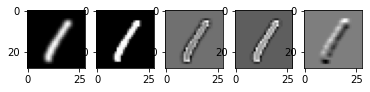

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


img = img.reshape(-1,28,28,1)
# 1. random으로 실행
#W1 = tf.Variable(tf.random.normal([3, 3, 1, 5], 0, 1))
# 2. 특정 필터로 실행
W1 = tf.Variable([[[[0.0625, 0., -1., 0.,-1.]], [[0.125, 0., -1.,-1.,-2.]], [[0.0625,0.,-1., 0.,-1.]]],
                  [[[0.125,  0., -1.,-1., 0.]], [[0.25,  1.,  8., 5., 0.]], [[0.125,0., -1.,-1., 0.]]],
                  [[[0.0625, 0., -1., 0., 1.]], [[0.125, 0., -1.,-1., 2.]], [[0.0625,0.,-1., 0., 1.]]]])

conv2d_img = tf.nn.conv2d(img, W1, strides=[1, 1, 1, 1], padding='SAME')
#print(conv2d_img)
print(conv2d_img.shape)
#sess.run(tf.global_variables_initializer())
#conv2d_img = conv2d.eval()
conv2d_img_swap = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img_swap):
    #plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')


'''
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 1, 1, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    #plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')
'''

(1, 14, 14, 5)


"\npool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[\n                        1, 2, 2, 1], padding='SAME')\nprint(pool)\nsess.run(tf.global_variables_initializer())\npool_img = pool.eval()\npool_img = np.swapaxes(pool_img, 0, 3)\nfor i, one_img in enumerate(pool_img):\n    #plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')  \n    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')\n"

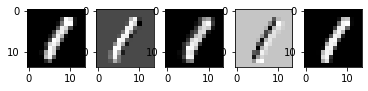

In [ ]:
pool_img = tf.nn.max_pool(conv2d_img, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
#print(pool_img)
print(pool_img.shape)
pool_img_swap = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img_swap):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

'''
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    #plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')  
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')
'''

-----

------

# Pytorch 예제

In [ ]:
import torch
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import numpy as np
import matplotlib.pyplot as plt

*   TF1, Keras, TF2 (N, H, W,  C)
```
(1, 3, 3, 1)
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
```
*   Pytorch (N, C, H, W)
```
(1, 1, 3, 3)
image = np.array([[[[1, 2, 3],
                    [4, 5, 6], 
                    [7, 8, 9]]]], dtype=np.float32)
```

4
(1, 1, 3, 3)
float32
[[[[1. 2. 3.]
   [4. 5. 6.]
   [7. 8. 9.]]]]


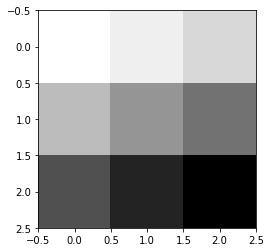

In [ ]:

# Pytorch (N, C, W, H)
image = np.array([[[[1, 2, 3],
                    [4, 5, 6], 
                    [7, 8, 9]]]], dtype=np.float32)
print(image.ndim)
print(image.shape)
print(image.dtype)
print(image)
plt.imshow(image.reshape(3,3), cmap='Greys')

imag:
 [[[[1. 2. 3.]
   [4. 5. 6.]
   [7. 8. 9.]]]]
image.shape (1, 1, 3, 3)
weight.shape (1, 1, 2, 2)
conv2d_img.shape torch.Size([1, 1, 2, 2])
[[12.158943 16.158943]
 [24.158943 28.158943]]


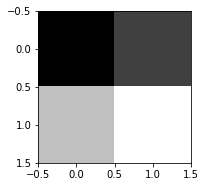

In [ ]:
print("imag:\n", image)
print("image.shape", image.shape)
#NHWC
'''
weight = np.array([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
'''
#NCHW
weight = np.array([[[[1., 1.],
                    [1., 1.]]]])

print("weight.shape", weight.shape)


conv1 = torch.nn.Conv2d(1, 1, 2)              # 인스턴스 생성
conv1.weight.data = torch.Tensor(weight)
#weight of size [2, 2, 1, 1], expected input[1, 1, 3, 3]
conv2d_img = conv1(torch.Tensor(Variable(torch.Tensor(image))))
#conv2d_img = torch.nn.Conv2d(1, 1, 2)(torch.Tensor(Variable(torch.Tensor(image))))

print("conv2d_img.shape", conv2d_img.shape)
conv2d_img_numpy = conv2d_img.detach().numpy()
#conv2d_img = np.swapaxes(conv2d_img.numpy, 0, 3)
for i, one_img in enumerate(conv2d_img_numpy):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

imag:
 [[[[1. 2. 3.]
   [4. 5. 6.]
   [7. 8. 9.]]]]
image.shape (1, 1, 3, 3)
weight.shape (1, 1, 2, 2)
conv2d_img.shape torch.Size([1, 1, 4, 4])
[[ 0.785797  2.785797  4.785797  2.785797]
 [ 4.785797 11.785797 15.785797  8.785797]
 [10.785797 23.785797 27.785797 14.785797]
 [ 6.785797 14.785797 16.785797  8.785797]]


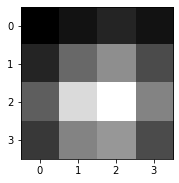

In [ ]:
print("imag:\n", image)
print("image.shape", image.shape)
#NHWC
'''
weight = np.array([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
'''
#NCHW
weight = np.array([[[[1., 1.],
                     [1., 1.]]]])
print("weight.shape", weight.shape)

conv1 = torch.nn.Conv2d(1, 1, 2, padding = 1)
conv1.weight.data = torch.Tensor(weight)

#weight of size [2, 2, 1, 1], expected input[1, 1, 3, 3]
conv2d_img = conv1(Variable(torch.Tensor(image)))
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img_numpy = conv2d_img.detach().numpy()
#conv2d_img = np.swapaxes(conv2d_img.numpy, 0, 3)
for i, one_img in enumerate(conv2d_img_numpy):
    print(one_img.reshape(4,4))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(4,4), cmap='gray')

## 3 filters (3,1,2,2)

H(2) W(2) I_CH(1) O_CH(3)
 -->   O_CH(3) I_CH(1) H(2) W(2)

image.shape (1, 1, 3, 3)
weight_01.shape (3, 1, 2, 2)
conv1.weight.data.shape torch.Size([3, 1, 2, 2])
conv2d_img_01.shape torch.Size([1, 3, 4, 4])
(1, 4, 4)
[[ 0.8036864  2.8036864  4.803686   2.8036864]
 [ 4.803686  11.803686  15.803686   8.803686 ]
 [10.803686  23.803686  27.803686  14.803686 ]
 [ 6.803686  14.803686  16.803686   8.803686 ]]
(1, 4, 4)
[[  9.503081  29.503082  49.503082  29.503082]
 [ 49.503082 119.50308  159.50308   89.50308 ]
 [109.50308  239.50308  279.50308  149.50308 ]
 [ 69.50308  149.50308  169.50308   89.50308 ]]
(1, 4, 4)
[[ -1.2138476  -3.2138476  -5.2138476  -3.2138476]
 [ -5.2138476 -12.213848  -16.213848   -9.213848 ]
 [-11.213848  -24.213848  -28.213848  -15.213848 ]
 [ -7.2138476 -15.213848  -17.213848   -9.213847 ]]


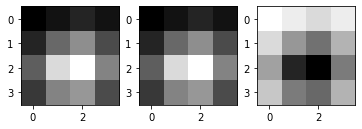

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight_01 = np.array([[[[1.,1.],  [1.,1.]]],
                      [[[10.,10.],[10.,10.]]],
                      [[[-1.,-1.],[-1.,-1.]]]])
print("weight_01.shape", weight_01.shape)
conv1 = torch.nn.Conv2d(1, 3, 2, padding = 1)
print("conv1.weight.data.shape", conv1.weight.data.shape)
conv1.weight.data = torch.Tensor(weight_01)

conv2d_img_01 = conv1(Variable(torch.Tensor(image)))
print("conv2d_img_01.shape", conv2d_img_01.shape)
conv2d_img_01_numpy = conv2d_img_01.detach().numpy()
conv2d_img_01_numpy = np.swapaxes(conv2d_img_01_numpy, 0, 1)
for i, one_img in enumerate(conv2d_img_01_numpy):
    print(one_img.shape)
    print(one_img.reshape(4,4))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(4,4), cmap='gray')

In [ ]:
image = np.array([[[[4, 3],[2, 1]]]], dtype=np.float32)

pool = torch.nn.MaxPool2d(2, stride=1)
pool_img = pool(torch.Tensor(Variable(torch.Tensor(image))))

print(pool_img.shape)

torch.Size([1, 1, 1, 1])


In [ ]:
image = np.array([[[[4, 3],[2, 1]]]], dtype=np.float32)

pool = torch.nn.MaxPool2d(2, stride=1, padding=1)
pool_img = pool(torch.Tensor(Variable(torch.Tensor(image))))

print(pool_img.shape)

torch.Size([1, 1, 3, 3])


[3, torch.Size([1, 28, 28]), torch.float32]


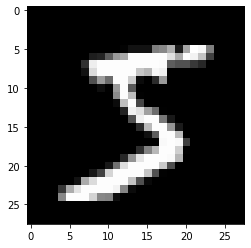

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

img, _ = mnist_train[0] # x is now a torch.Tensor
print([img.ndim, img.shape, img.dtype])

plt.imshow(img.numpy()[0], cmap='gray')

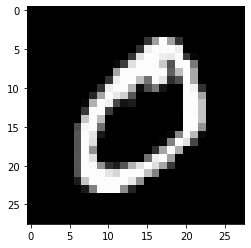

In [ ]:
img, _ = mnist_train[1] # x is now a torch.Tensor
plt.imshow(img.numpy()[0], cmap='gray')

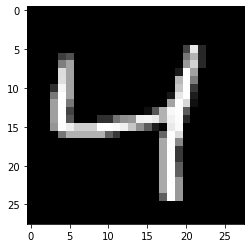

In [ ]:
img, _ = mnist_train[2] # x is now a torch.Tensor
plt.imshow(img.numpy()[0], cmap='gray')

torch.Size([1, 28, 28])


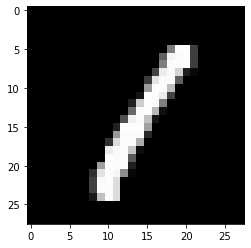

In [ ]:
img, _ = mnist_train[3] # x is now a torch.Tensor
print(img.shape)
plt.imshow(img.numpy()[0], cmap='gray')

* Pytorch (N, C, H, W)
```
[5, 1, 3, 3]
weight = np.array([
#Blur
 [[[0.0625, 0.125, 0.0625],
   [0.125,  0.25,  0.125],
   [0.0625, 0.125, 0.0625]]],
#identity
 [[[ 0.,     0.,    0.],
   [ 0.,     1.,    0.],
   [ 0.,     0.,    0.]]],
#outline
 [[[-1.,    -1.,   -1.],
   [-1.,     8.,   -1.],
   [-1.,    -1.,   -1.]]],
#Sharpen
 [[[ 0.,    -1.,    0.],
   [-1.,     5.,   -1.],
   [ 0.,    -1.,    0.]]],
#bottom sobel
 [[[-1.,    -2.,   -1.],
   [ 0.,     0.,    0.],
   [ 1.,     2.,    1.]]]
])
```

* 그외 필터
```
# top sobel
 [[1.,      2.,    1.],
  [0.,      0.,    0.],
  [-1.,    -2.,   -1.]],
#left sobel
 [[ 1.,     0.,   -1.],
  [ 2.,     0.,   -2.],
  [ 1.,     0.,   -1.]],
#right sobel
 [[-1.,     0.,    1.],
  [-2.,     0.,    2.],
  [-1.,     0.,    1.]
```


* TF1 (H, W, C, N)
```
[3, 3, 1, 5]
W1 = tf.Variable(
[[[[0.0625, 0., -1., 0.,-1.]], [[0.125, 0., -1.,-1.,-2.]], [[0.0625,0.,-1., 0.,-1.]]],
 [[[0.125,  0., -1.,-1., 0.]], [[0.25,  1.,  8., 5., 0.]], [[0.125,0., -1.,-1., 0.]]],
 [[[0.0625, 0., -1., 0., 1.]], [[0.125, 0., -1.,-1., 2.]], [[0.0625,0.,-1., 0., 1.]]]]
)
```

* TF2  (H, W, C, N)
```
weight = K.variable(
[[[[0.0625, 0., -1., 0.,-1.]], [[0.125, 0., -1.,-1.,-2.]], [[0.0625,0.,-1., 0.,-1.]]],
 [[[0.125,  0., -1.,-1., 0.]], [[0.25,  1.,  8., 5., 0.]], [[0.125,0., -1.,-1., 0.]]],
 [[[0.0625, 0., -1., 0., 1.]], [[0.125, 0., -1.,-1., 2.]], [[0.0625,0.,-1., 0., 1.]]]]
)
```


img.shape torch.Size([1, 1, 28, 28])
(5, 1, 3, 3)
conv2d_img_01.shape torch.Size([1, 5, 28, 28])


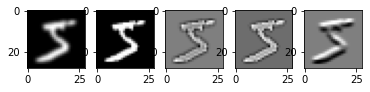

In [ ]:
img = img.reshape(-1,1,28,28)
# print("img:\n", img)
print("img.shape", img.shape)

weight_01 = np.array([
#Blur
 [[[0.0625, 0.125, 0.0625],
   [0.125,  0.25,  0.125],
   [0.0625, 0.125, 0.0625]]],
#identity
 [[[ 0.,     0.,    0.],
   [ 0.,     1.,    0.],
   [ 0.,     0.,    0.]]],
#outline
 [[[-1.,    -1.,   -1.],
   [-1.,     8.,   -1.],
   [-1.,    -1.,   -1.]]],
#Sharpen
 [[[ 0.,    -1.,    0.],
   [-1.,     5.,   -1.],
   [ 0.,    -1.,    0.]]],
#bottom sobel
 [[[-1.,    -2.,   -1.],
   [ 0.,     0.,    0.],
   [ 1.,     2.,    1.]]]
])

print(weight_01.shape)


conv1 = torch.nn.Conv2d(1, 5, kernel_size=3, stride=1, padding=1)
conv1.weight.data = torch.Tensor(weight_01)

conv2d_img_01 = conv1(Variable(img))
print("conv2d_img_01.shape", conv2d_img_01.shape)
conv2d_img_01_numpy = conv2d_img_01.detach().numpy()
conv2d_img_01_numpy = np.swapaxes(conv2d_img_01_numpy, 0, 1)
for i, one_img in enumerate(conv2d_img_01_numpy):
    #print(one_img.shape)
    #print(one_img.reshape(28,28))
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')

torch.Size([1, 5, 15, 15])


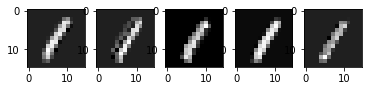

In [ ]:
pool = torch.nn.MaxPool2d(2, stride=2, padding=1)
pool_img = pool(conv2d_img_01)

#print(pool_img)
print(pool_img.shape)
pool_img_numpy = pool_img.detach().numpy()
pool_img_numpy_swap = np.swapaxes(pool_img_numpy, 0, 1)
for i, one_img in enumerate(pool_img_numpy_swap):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(15,15), cmap='gray')


# TF2 예제

In [ ]:
%tensorflow_version
%matplotlib inline
import tensorflow as tf
#import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.utils import plot_model
import numpy as np
from tensorflow.keras import backend as K

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


(1, 3, 3, 1)
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


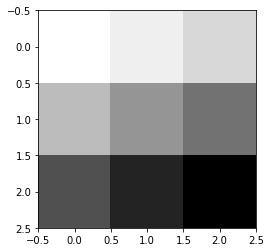

In [ ]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
print(image)
plt.imshow(image.reshape(3,3), cmap='Greys')

(2, 2, 1, 1)
<dtype: 'float32'>
(1, 3, 3, 1)
<tf.Variable 'Variable:0' shape=(1, 3, 3, 1) dtype=float32, numpy=
array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)>
(1, 2, 2, 1)
tf.Tensor(
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]], shape=(1, 2, 2, 1), dtype=float32)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


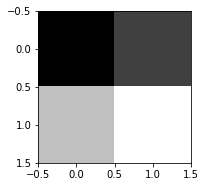

In [ ]:
weight = np.array([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])


def my_init(shape, dtype=None):
    print(shape)
    print(dtype)
    return K.variable(weight)

#    return K.variable([[[[0.]],[[1.]]],
#                       [[[1.]],[[0.]]]])


#x = K.variable([[[[1],[2],[3]],
#                   [[4],[5],[6]], 
#                   [[7],[8],[9]]]], dtype=np.float32)
x = K.variable(image)


conv2d_img = tf.keras.layers.Conv2D(1, 2, kernel_initializer=my_init, bias_initializer='zeros')(x)
print(x.shape)
print(x)
print(conv2d_img.shape)
print(conv2d_img)

print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

(2, 2, 1, 1)
<dtype: 'float32'>
(1, 3, 3, 1)
<tf.Variable 'Variable:0' shape=(1, 3, 3, 1) dtype=float32, numpy=
array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)>
(1, 3, 3, 1)
tf.Tensor(
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]], shape=(1, 3, 3, 1), dtype=float32)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


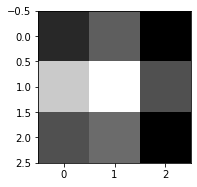

In [ ]:
weight = np.array([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])


def my_init(shape, dtype=None):
    print(shape)
    print(dtype)
    return K.variable(weight)

#    return K.variable([[[[0.]],[[1.]]],
#                       [[[1.]],[[0.]]]])


#x = K.variable([[[[1],[2],[3]],
#                   [[4],[5],[6]], 
#                   [[7],[8],[9]]]], dtype=np.float32)
x = K.variable(image)


conv2d_img = tf.keras.layers.Conv2D(1, 2, kernel_initializer=my_init, bias_initializer='zeros', padding="same")(x)
print(x.shape)
print(x)
print(conv2d_img.shape)
print(conv2d_img)

print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

(2, 2, 1, 3)
<dtype: 'float32'>
(1, 3, 3, 1)
<tf.Variable 'Variable:0' shape=(1, 3, 3, 1) dtype=float32, numpy=
array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)>
(1, 3, 3, 3)
tf.Tensor(
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]], shape=(1, 3, 3, 3), dtype=float32)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


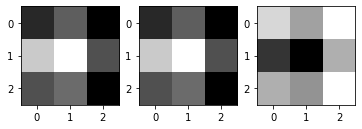

In [ ]:
#weight = np.array([[[[1.]],[[1.]]],
#                   [[[1.]],[[1.]]]
#                   
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])

def my_init(shape, dtype=None):
    print(shape)
    print(dtype)
    return K.variable(weight)

#    return K.variable([[[[0.]],[[1.]]],
#                       [[[1.]],[[0.]]]])


#x = K.variable([[[[1],[2],[3]],
#                   [[4],[5],[6]], 
#                   [[7],[8],[9]]]], dtype=np.float32)
x = K.variable(image)


conv2d_img = tf.keras.layers.Conv2D(3, 2, kernel_initializer=my_init, bias_initializer='zeros', padding="same")(x)
print(x.shape)
print(x)
print(conv2d_img.shape)
print(conv2d_img)

print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [ ]:
image = np.array([[[[4],[3]],
                  [[2],[1]]]], dtype=np.float32)
x = K.variable(image)
pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid')(x)

print(pool.shape)

(1, 1, 1, 1)


In [ ]:
image = np.array([[[[4],[3]],
                  [[2],[1]]]], dtype=np.float32)
x = K.variable(image)
pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1, padding='same')(x)

print(pool.shape)

(1, 2, 2, 1)


In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


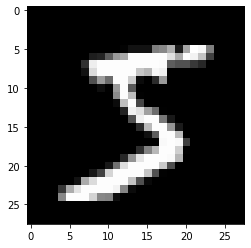

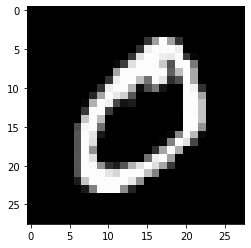

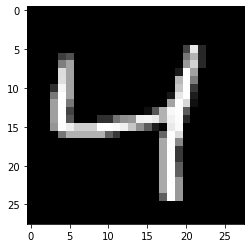

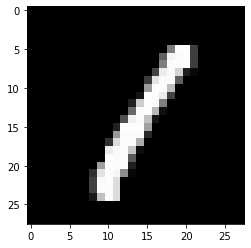

In [ ]:
#img = x_train.images[0].reshape(28,28)
img = X_train[0].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

img = X_train[1].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

img = X_train[2].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

img = X_train[3].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

(3, 3, 1, 5)
<dtype: 'float32'>
(1, 28, 28, 5)


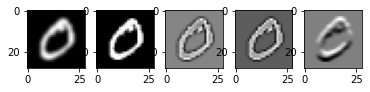

In [ ]:
x = K.variable(X_train[1].reshape(-1,28,28,1))

weight = K.variable([[[[0.0625, 0., -1., 0.,-1.]], [[0.125, 0., -1.,-1.,-2.]], [[0.0625,0.,-1., 0.,-1.]]],
                  [[[0.125,  0., -1.,-1., 0.]], [[0.25,  1.,  8., 5., 0.]], [[0.125,0., -1.,-1., 0.]]],
                  [[[0.0625, 0., -1., 0., 1.]], [[0.125, 0., -1.,-1., 2.]], [[0.0625,0.,-1., 0., 1.]]]])

def my_init(shape, dtype=None):
    print(shape)
    print(dtype)
    return weight
    #return K.variable(weight)

#conv2d_img = tf.keras.layers.Conv2D(5, 3, kernel_initializer = 'random_normal', bias_initializer='zeros', padding="same")(x)
conv2d_img = tf.keras.layers.Conv2D(5, 3, kernel_initializer = my_init, bias_initializer='zeros', padding="same")(x)
#xxx = tf.keras.layers.Conv2D(5, 3, kernel_initializer = my_init, bias_initializer='zeros', padding="same")
#conv2d_img = xxx(x)

#print(conv2d_img)
print(conv2d_img.shape)

conv2d_img_swap = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img_swap):
    #plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')

(1, 14, 14, 5)


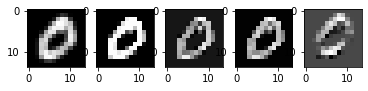

In [ ]:
pool_img = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(conv2d_img)
#pool_img = tf.nn.max_pool(conv2d_img, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#print(pool_img)
print(pool_img.shape)
pool_img_swap = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img_swap):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

# Steps to implement CNN and Conv2d function with pytorch.
## Includes dimension change in very detail.


In [ ]:
import torch.nn as nn
import torch
from torch.autograd import Variable
import numpy as np

# Conv2d function summary

```
nn.Conv2d(input_channel, output_channel, kernel_size)
  - in_channels (int) – Number of channels in the input image
  - out_channels (int) – Number of channels produced by the convolution
  - kernel_size (int or tuple) – Size of the convolving kernel
  - stride (int or tuple, optional) – Stride of the convolution. Default: 1
  - padding (int or tuple, optional) – Zero-padding added to both sides of the input. Default: 0
  - dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1
  - groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1
  - bias (bool, optional) – If True, adds a learnable bias to the output. Default: True
```

#Let's have a first look for  in_channel=1 , and  out_channel=1

In [ ]:
input1 = Variable(torch.ones(1,1,6,6))
print(input1)
weight1 = torch.ones(1,1,3,3)
bias1 = torch.zeros(1)
x = torch.nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3)
x.weight.data = weight1
x.bias.data = bias1
print(list(x.parameters()))
out1 = x(input1)
print(out1)

tensor([[[[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]]]])
[Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]], requires_grad=True), Parameter containing:
tensor([0.], requires_grad=True)]
tensor([[[[9., 9., 9., 9.],
          [9., 9., 9., 9.],
          [9., 9., 9., 9.],
          [9., 9., 9., 9.]]]], grad_fn=<MkldnnConvolutionBackward>)


```
In this case, kernel size is 3, input_channel and output_channel is 1, then

  - kernel=1,1,3,3 

Denote in_channel is X , out_channel is N , kernel size is K.

  - kernel=N,X,K,K 

As can be seen from above,  out  only has one channel, it means only 1 feature map got.
x.parameters  has two parameter, one is W matrix, the other one is bias.

W  matrix is kernel matrix

If increase N from 1 to 3, then it means they have 3 kernels to convolv one channel,

The result would contains 3 feature map:
```

In [ ]:
input2 = Variable(torch.ones(1,1,6,6))
print(input2)
weight2 = Variable(torch.ones(3,1,3,3))
bias2 = torch.zeros(3)
x2 = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3)
x2.weight.data=weight2
x2.bias.data=bias2
print(list(x2.parameters()))
out2 = x2(input2)
print("out2.size is {}".format(out2.size()))
print(out2)

tensor([[[[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]]]])
[Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],


        [[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],


        [[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]], requires_grad=True), Parameter containing:
tensor([0., 0., 0.], requires_grad=True)]
out2.size is torch.Size([1, 3, 4, 4])
tensor([[[[9., 9., 9., 9.],
          [9., 9., 9., 9.],
          [9., 9., 9., 9.],
          [9., 9., 9., 9.]],

         [[9., 9., 9., 9.],
          [9., 9., 9., 9.],
          [9., 9., 9., 9.],
          [9., 9., 9., 9.]],

         [[9., 9., 9., 9.],
          [9., 9., 9., 9.],
          [9., 9., 9., 9.],
          [9., 9., 9., 9.]]]], grad_fn=<MkldnnConvolutionBackward>)


```
The output feature map is 3, means out_channel is 3, use 3 filters to convolv  input2 ,

kernel size is  3,1,3,3 , means use 3 filters to make up a kernel.
```

![image](https://hanqingguo.github.io/assets/media/cnn1.png)

```
When  in_channel  increase to X (3 as figure above), and  out_channel  N (1 as figure above) has different meaning.

There are  N  filters, each filter is  3∗3 . Feature map is  4∗4
```

In [ ]:
input3 = Variable(torch.ones(1,3,6,6))
print(input3)
weight3 = torch.ones(1,3,3,3)
#print(weight3)
bias3 = torch.zeros(1)
x3 = torch.nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size = 3)
x3.weight.data = weight3
x3.bias.data = bias3
print(list(x3.parameters()))
out3 = x3(input3)
print("\nout3.size is {}\n".format(out3.size()))
print(out3)

tensor([[[[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]]]])
[Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]], requires_grad=True), Parameter containing:
tensor([0.], requires_grad=True)]

out3.size is torch.Si

![image](https://hanqingguo.github.io/assets/media/cnn2.png)

In [ ]:
input4 = Variable(torch.ones(1,3,6,6))
print(input4)
weight4 = torch.ones(2,3,3,3)
#print(weight4)
bias4 = torch.zeros(2)
x4 = torch.nn.Conv2d(in_channels = 3, out_channels = 2, kernel_size = 3)
x4.weight.data = weight4
x4.bias.data = bias4
out4 = x4(input4)
print(list(x4.parameters()))
print("\n\nOut size is  " + str(out4.size())+"\n\n")
print(out4)

tensor([[[[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]]]])
[Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],


        [[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],


# 영상 입력에 대한 정리

1.   Summary of the Reading and Writing Ways of Pictures in Python Image Libraries
 - https://programmer.help/blogs/summary-of-the-reading-and-writing-ways-of-pictures-in-python-image-libraries.html
 
2.   항목 추가


Saving Lenna.png to Lenna.png
(220, 220, 4)


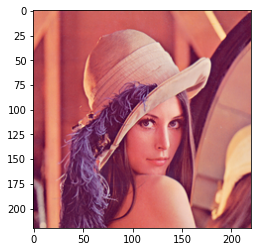

(220, 220, 3)


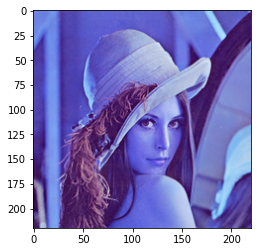

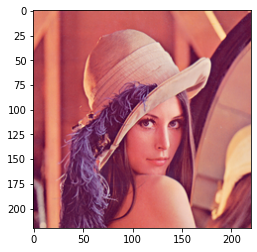

(220, 220)


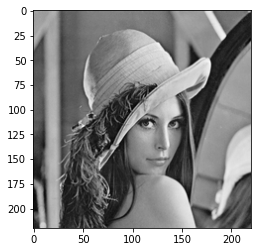

<BarContainer object of 256 artists>

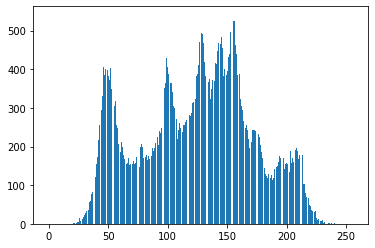

In [ ]:
%matplotlib inline
import tensorflow as tf
from google.colab import files
import numpy as np
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = plt.imread(filename)
print(img.shape)
plt.imshow(img)
plt.show()

# OpenCV stores color images using the BGR convention 
# while matplotlib uses the RGB convention.
img = cv2.imread(filename)
print(img.shape)
#plt.imshow(img, cmap='gray')
#cv2.imshow(img)    # disabled by colab
plt.imshow(img)
plt.show()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#input("press any key")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

#input("press any key")
###insert code here###
hist, bins = np.histogram(img, bins=256, range=(-0.5, 255.5))
plt.bar(range(256), hist)
######################

(1, 220, 220, 5)
Blur


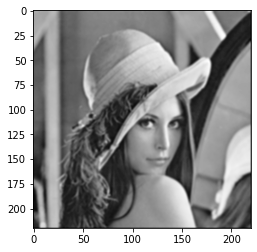

identity


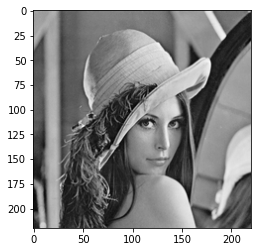

outline


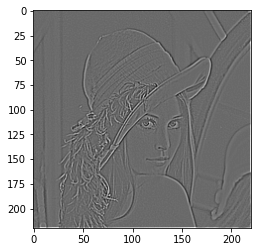

Sharpen


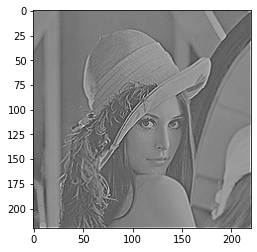

bottom sobel


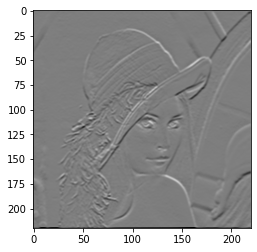

In [ ]:
#img = img.reshape(-1, 28, 28, 1)
#img = img.reshape(-1, 2448, 3264, 1)
img = img.reshape(-1, 220, 220, 1)
 
# 1. random으로 실행
#W1 = tf.Variable(tf.random.normal([3, 3, 1, 5], 0, 1))
# 2. 특정 필터로 실행
#                   Blur, identity, outline, Sharpen, bottom sobel
W1 = tf.constant([[[[0.0625, 0., -1., 0.,-1.]], [[0.125, 0., -1.,-1.,-2.]], [[0.0625,0.,-1., 0.,-1.]]],
                  [[[0.125,  0., -1.,-1., 0.]], [[0.25,  1.,  8., 5., 0.]], [[0.125,0., -1.,-1., 0.]]],
                  [[[0.0625, 0., -1., 0., 1.]], [[0.125, 0., -1.,-1., 2.]], [[0.0625,0.,-1., 0., 1.]]]])

filter_name = ["Blur", "identity", "outline", "Sharpen", "bottom sobel"]

conv2d_img = tf.nn.conv2d(img, W1, strides=[1, 1, 1, 1], padding='SAME')
#print(conv2d_img)
print(conv2d_img.shape)
conv2d_img_swap = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img_swap):
    print(filter_name[i])
    #plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
    #plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')
    #plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(220,220), cmap='gray')
    plt.imshow(one_img.reshape(220,220), cmap='gray')
    plt.show()


##Python, numpy, openCV 예제
https://076923.github.io/posts/#Python-OpenCV





# 그림에 색과 숫자 표현

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


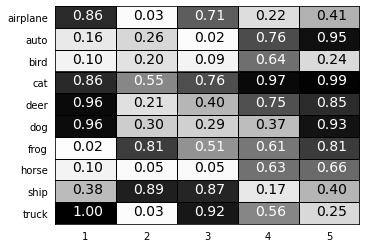

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools

table = np.random.uniform(low=0.0, high=1.0, size=(10,5))

class_names = ['airplane', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure()

plt.imshow(table, interpolation='nearest', cmap=plt.cm.Greys, vmin=0, vmax=1, aspect='equal', extent=[0,14,10,0])
plt.yticks(np.arange(10)+0.5, class_names)
plt.xticks(np.arange(5)*2.8 + 1.4, ['1', '2', '3', '4', '5'])
ax = plt.axes()
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

matplotlib.rcParams.update({'font.size': 14})

ax = plt.gca()

# Minor ticks
ax.set_xticks(np.arange(1, 5) * 2.8, minor=True);
ax.set_yticks(np.arange(1, 10, 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

for i,j in itertools.product(range(table.shape[0]), range(table.shape[1])):
    plt.text(j*2.8+1.5, i+0.6, format(table[i,j], '.2f'),
             horizontalalignment="center",
             color="white" if table[i,j] > 0.5 else "black")

plt.show()

참고

https://medium.com/towards-artificial-intelligence/features-in-image-part-2-70fc46dd316a


(1, 6, 6, 1)


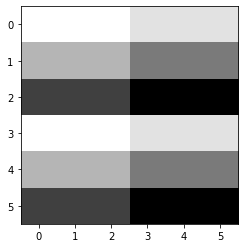

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
image = np.array([[[[1],[1],[1],[2],[2],[2]],
                   [[3],[3],[3],[4],[4],[4]], 
                   [[5],[5],[5],[6],[6],[6]], 
                   [[1],[1],[1],[2],[2],[2]], 
                   [[3],[3],[3],[4],[4],[4]], 
                   [[5],[5],[5],[6],[6],[6]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(6,6), cmap='Greys')

image.shape (1, 6, 6, 1)
weight.shape (3, 3, 1, 1)
conv2d.shape (1, 4, 4, 1)
[[27. 30. 33. 36.]
 [27. 30. 33. 36.]
 [27. 30. 33. 36.]
 [27. 30. 33. 36.]]


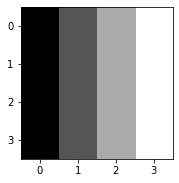

In [ ]:
import tensorflow as tf

# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]],[[1.]]],
                      [[[1.]],[[1.]],[[1.]]],
                      [[[1.]],[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d_img = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
print("conv2d.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(4,4))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(4,4), cmap='gray')


In [ ]:
import tensorflow as tf
w = tf.Variable(2.0, name='weight')
b = tf.Variable(0.7, name='bias')
# z를 평가합니다
for x in [1.0, 0.6, -1.8]:
    z = w * x + b
    print('x=%4.1f --> z=%4.1f'%(x, z))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


# Conv2d 인스턴스에서 weight 값 구하기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[[ 0.15320511 -0.02940598 -0.04592305]
   [ 0.15489246 -0.01251477 -0.01507063]
   [ 0.00641876  0.05627172  0.11640172]]

  [[-0.01885207 -0.16217324  0.11474551]
   [-0.10336411 -0.17142475  0.02399872]
   [ 0.14821623 -0.05115447 -0.0116213 ]]

  [[ 0.13910235 -0.18766204  0.00487904]
   [ 0.00345332  0.13786116 -0.10093728]
   [-0.11828654  0.00983822  0.03905632]]]]


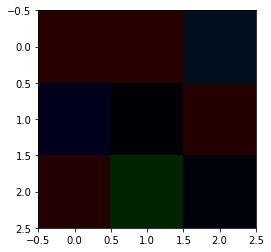

In [ ]:
conv1 = torch.nn.Conv2d(3, 1, 3)
weight = conv1.weight.data.numpy()
print(weight)
plt.imshow(weight[0, ...])

torch.Size([1, 1, 8, 8])
tensor([[[[ 1.6176e+01,  4.8798e+01,  4.7705e+01, -3.4116e+01, -6.6576e+01,
           -3.0613e+01,  1.8369e+01,  5.7186e+01],
          [ 2.7958e+01,  6.1531e+01,  1.1782e+02,  5.1610e+01,  1.4772e+01,
            4.7370e+00,  5.5694e+01,  4.1216e+01],
          [ 2.4455e+01,  3.1416e+01,  5.5613e+01,  2.9233e+01,  5.8066e+01,
            3.7567e+01,  6.6929e+01,  9.3903e+00],
          [ 1.8563e+01, -1.1061e+01,  1.2633e+01,  6.2552e+00,  5.5457e+01,
            5.0917e+01,  6.4281e+01,  2.3557e+01],
          [ 6.8820e+01,  1.4833e+01, -2.6505e+01, -3.1066e+01,  8.7170e+00,
           -1.3725e+01, -1.8776e+00, -8.4813e-01],
          [ 6.1906e+00,  5.1097e+00,  1.1329e+01,  4.0385e+01,  4.8945e+01,
            5.5588e-01,  1.4894e+01,  1.1749e+00],
          [ 3.2259e+01,  3.3030e+01, -2.4666e+01,  3.0571e+01,  5.3336e+01,
            3.5038e+01, -8.1454e-02, -3.9097e+01],
          [-3.6463e+00,  4.9821e+01,  6.0830e+00,  6.5587e+01,  1.0222e+02,
          

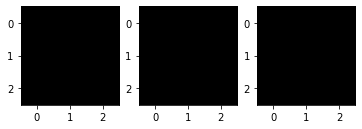

tensor([[ 1.6176e+01,  4.8798e+01,  4.7705e+01, -3.4116e+01, -6.6576e+01,
         -3.0613e+01,  1.8369e+01,  5.7186e+01],
        [ 2.7958e+01,  6.1531e+01,  1.1782e+02,  5.1610e+01,  1.4772e+01,
          4.7370e+00,  5.5694e+01,  4.1216e+01],
        [ 2.4455e+01,  3.1416e+01,  5.5613e+01,  2.9233e+01,  5.8066e+01,
          3.7567e+01,  6.6929e+01,  9.3903e+00],
        [ 1.8563e+01, -1.1061e+01,  1.2633e+01,  6.2552e+00,  5.5457e+01,
          5.0917e+01,  6.4281e+01,  2.3557e+01],
        [ 6.8820e+01,  1.4833e+01, -2.6505e+01, -3.1066e+01,  8.7170e+00,
         -1.3725e+01, -1.8776e+00, -8.4813e-01],
        [ 6.1906e+00,  5.1097e+00,  1.1329e+01,  4.0385e+01,  4.8945e+01,
          5.5588e-01,  1.4894e+01,  1.1749e+00],
        [ 3.2259e+01,  3.3030e+01, -2.4666e+01,  3.0571e+01,  5.3336e+01,
          3.5038e+01, -8.1454e-02, -3.9097e+01],
        [-3.6463e+00,  4.9821e+01,  6.0830e+00,  6.5587e+01,  1.0222e+02,
          8.6594e+01,  4.7506e+01, -3.3284e+01]], grad_fn=<ViewBa

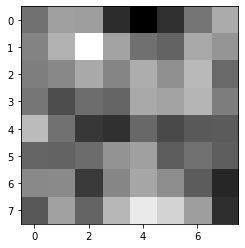

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

conv1 = torch.nn.Conv2d(3, 1, 3)
#torch.nn.init.xavier_uniform_(conv1.weight)

#conv1.weight.data.uniform_(0.0, 1.0)
conv1.weight.data.fill_(10.0)
conv1.bias.data.fill_(10)
input = torch.randn(1, 3, 10, 10)
output = conv1(input)

print(output.shape)
print(output)

weight = conv1.weight.data.numpy()
print(weight)
#plt.imshow(weight[0, ...])


weight = np.swapaxes(weight, 0, 3)
for i, one_img in enumerate(weight):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
plt.show()

#output = np.swapaxes(output, 0, 3)
for i, one_img in enumerate(output):
    print(one_img.reshape(8,8))
    plt.subplot(1,1,i+1), plt.imshow(one_img.reshape(8,8).detach().numpy(), cmap='gray')
plt.show()

1. covolution 연산에 대하여
2. filter의 역할
3. 기본동작
합성곱 -> Stride -> padding 

https://setosa.io/ev/image-kernels/

https://colab.research.google.com/drive/1omS5tgm2FnkOCDXIPQzAz9Px2ra_Vwic#scrollTo=4I8h8odxbhSJ

필터의 특성 파악 - 위 예제에서 사용됨

```
Blur
[[[[0.0625]], [[0.125]], [[0.0625]]],
 [[[0.125]],  [[0.25]],  [[0.125]]],
 [[[0.0625]], [[0.125]], [[0.0625]]]])

Sharpen
[[[[0.]],  [[-1.]], [[0.]]],
 [[[-1.]], [[5]],   [[-1.]]],
 [[[0.]],  [[-1.]], [[0.]]]])

outline
[[[[-1.]], [[-1.]], [[-1.]]],
 [[[-1.]], [[8]],   [[-1.]]],
 [[[-1.]], [[-1.]], [[-1.]]]])

identity
[[[[0.]], [[0.]], [[0.]]],
 [[[0.]], [[1]], [[0.]]],
 [[[0.]], [[0.]], [[0.]]]])

top sobel
[[[[1.]],  [[2.]],  [[1.]]],
 [[[0.]],  [[0]],   [[0.]]],
 [[[-1.]], [[-2.]], [[-1.]]]])

bottom sobel
[[[[-1.]], [[-2.]], [[-1.]]],
 [[[0.]],  [[0]],   [[0.]]],
 [[[1.]],  [[2.]],  [[1.]]]])

left sobel
[[[[1.]], [[0.]], [[-1.]]],
 [[[2.]], [[0]],  [[-2.]]],
 [[[1.]], [[0.]], [[-1.]]]])

right sobel
[[[[-1.]], [[0.]], [[1.]]],
 [[[-2.]], [[0]],  [[2.]]],
 [[[-1.]], [[0.]], [[1.]]]])
```

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x
(1, 28, 28, 5)


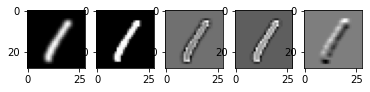

In [ ]:
%tensorflow_version
%matplotlib inline
import tensorflow as tf
#import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

img = img.reshape(-1,28,28,1)
#W1 = tf.Variable(tf.random.normal([3, 3, 1, 5], 0, 1))
W1 = tf.constant([[[[0.0625, 0., -1., 0.,-1.]], [[0.125, 0., -1.,-1.,-2.]], [[0.0625,0.,-1., 0.,-1.]]],
                  [[[0.125,  0., -1.,-1., 0.]], [[0.25,  1.,  8., 5., 0.]], [[0.125,0., -1.,-1., 0.]]],
                  [[[0.0625, 0., -1., 0., 1.]], [[0.125, 0., -1.,-1., 2.]], [[0.0625,0.,-1., 0., 1.]]]])
#blur, identity, outline, sharpen, bottom sobel

conv2d_img = tf.nn.conv2d(img, W1, strides=[1, 1, 1, 1], padding='SAME')
#print(conv2d_img)
print(conv2d_img.shape)
conv2d_img_swap = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img_swap):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')